In [11]:
## IMport libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import percentile
from pandas import read_excel
import warnings
warnings.filterwarnings('ignore')
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})
from scipy.stats import norm
import statistics

In [2]:
## importing the files 

df1 = read_csv('Airflow_level_masspull.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df2 = read_csv('Chemical_add_variables.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df3 = read_csv('Cyclone_feed_size.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df4 = read_csv('HGO_cyclone_feed_size.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#print(df.head())

In [3]:
## Making copy of dataframe
df_m=df1.copy()
df_n=df2.copy()
df_o=df3.copy()
df_p=df4.copy()

# FGO Analysis

In [4]:
"""We will be considering the below mentioned attributes for FGO Univariate Analysis.
PGR:CY1001:DIC4003-OP
PGR:CY1001:DIC4003-PV
PGR:CY1001:DIC4003-SP
FGO:FGOMASSPULL:WIC5401-OP
FGO:FGOMASSPULL:WIC5401-PV
FGO:FGOMASSPULL:WIC5401-SP
FGO:SN1002:AIC4010-OP
FGO:SN1002:AIC4010-PV
FGO:SN1002:AIC4010-SP
"""

'We will be considering the below mentioned attributes for FGO Univariate Analysis.\nPGR:CY1001:DIC4003-OP\nPGR:CY1001:DIC4003-PV\nPGR:CY1001:DIC4003-SP\nFGO:FGOMASSPULL:WIC5401-OP\nFGO:FGOMASSPULL:WIC5401-PV\nFGO:FGOMASSPULL:WIC5401-SP\nFGO:SN1002:AIC4010-OP\nFGO:SN1002:AIC4010-PV\nFGO:SN1002:AIC4010-SP\n'

In [5]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [127]:
# NumericDtype(df_m)
# NumericDtype(df_n)
# NumericDtype(df_o)
NumericDtype(df_p)

In [125]:
df_p['PGR:CY2001:DIC6053-OP'].std()


0.016336019079156334

In [7]:
#Considering FGO Cyclone Overflow Density Control

# FGO Cyclone Overflow Density Control OP

No handles with labels found to put in legend.


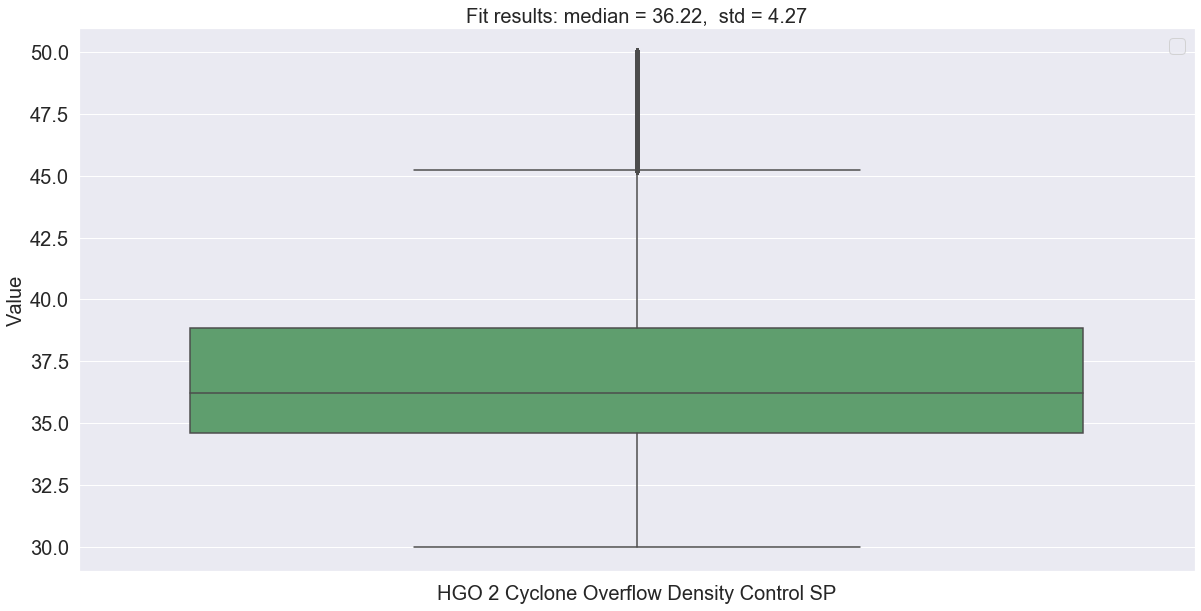

In [137]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-SP'].dropna().values)
a=df_p['PGR:CY2001:DIC6053-SP'].median()
pp = PdfPages('HGO 2 Cyclone Overflow Density Control SP Output1_plots.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-SP'],data=df_p,color='g')
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
title = "Fit results: median = %.2f,  std = %.2f" % (a, std)
plt.title(title,fontsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [138]:
# Q1 = df_n['FGO:SN1002:AIC4010-SP'].quantile(0.25)
# Q3 = df_n['FGO:SN1002:AIC4010-SP'].quantile(0.75)
# IQR = Q3 - Q1
# outliers=((df_n['FGO:SN1002:AIC4010-SP']< (Q1 - 1.5 * IQR)) | (df_n['FGO:SN1002:AIC4010-SP']> (Q3 + 1.5 * IQR))).sum()
# outliers

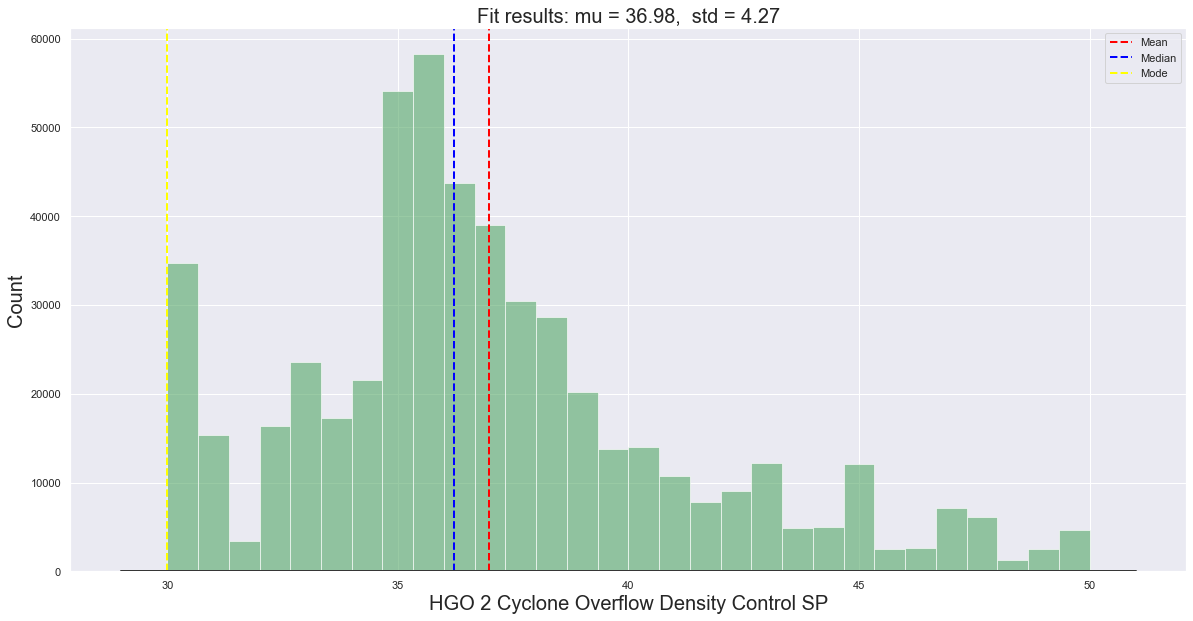

In [139]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
#txt="FGO Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-SP'].dropna().values, bins=30, density=False, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 800)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title,fontsize=20)
plt.xlabel('HGO 2 Cyclone Overflow Density Control SP',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.legend()
#fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

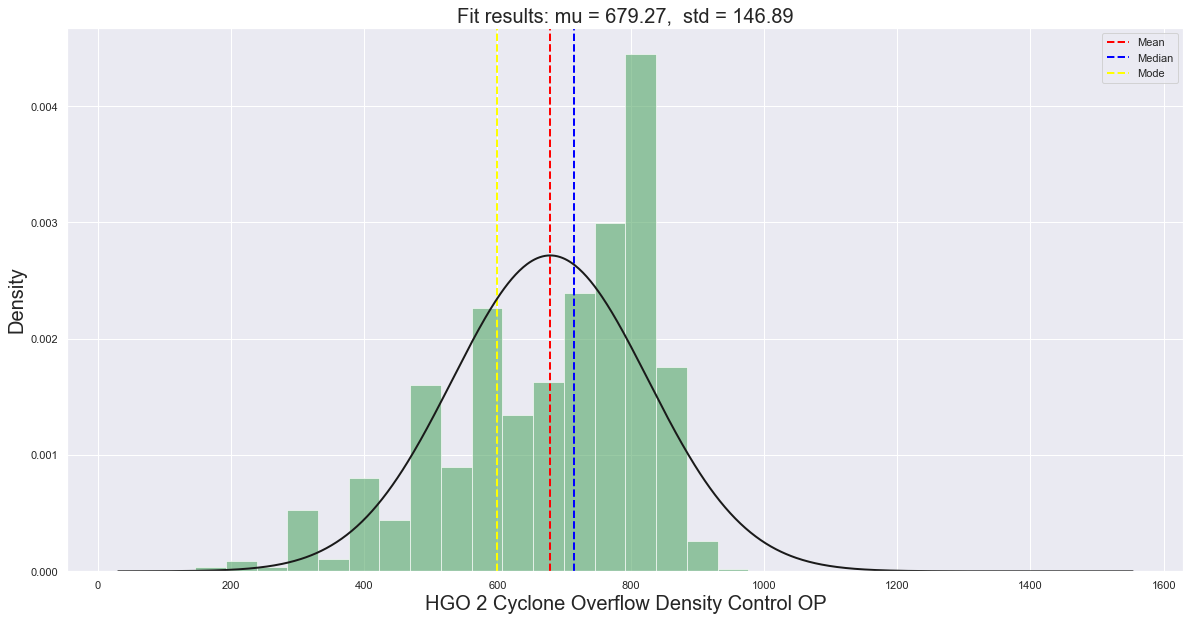

In [140]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
#txt="FGO Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-OP'].dropna().values, bins=30, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 800)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title,fontsize=20)
plt.xlabel('HGO 2 Cyclone Overflow Density Control OP',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.legend()
#ig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# [OV] FGO Cyclone Overflow Density Control PV

In [ ]:
df_o['PGR:CY1001:DIC4003-PV'].skew()

In [ ]:
df_o['PGR:CY1001:DIC4003-PV'].kurtosis()

In [ ]:
df_o['PGR:CY1001:DIC4003-PV'].std()

In [ ]:
df_o['PGR:CY1001:DIC4003-PV'].var()

In [ ]:
df_o['PGR:CY1001:DIC4003-PV'].isnull().sum()

In [ ]:
pp = PdfPages('[OV] FGO Cyclone Overflow Density Control PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_o['PGR:CY1001:DIC4003-PV'],data=df_o)
ax.set(xlabel='[OV] FGO Cyclone Overflow Density Control PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_o['PGR:CY1001:DIC4003-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('[OV] FGO Cyclone Overflow Density Control PV_Histogram_plot.pdf')
fig=plt.figure()
txt="[OV] FGO Cyclone Overflow Density Control PV_Histogram_plot"
plt.hist(df_o['PGR:CY1001:DIC4003-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_o['PGR:CY1001:DIC4003-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_o['PGR:CY1001:DIC4003-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_o['PGR:CY1001:DIC4003-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Cyclone Overflow Density Control SP


In [ ]:
df_o['PGR:CY1001:DIC4003-SP'].skew()

In [ ]:
df_o['PGR:CY1001:DIC4003-SP'].kurtosis()

In [ ]:
df_o['PGR:CY1001:DIC4003-SP'].std()

In [ ]:
df_o['PGR:CY1001:DIC4003-SP'].var()

In [ ]:
df_o['PGR:CY1001:DIC4003-SP'].isnull().sum()

In [ ]:
pp = PdfPages('FGO Cyclone Overflow Density Control SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_o['PGR:CY1001:DIC4003-SP'],data=df_o)
ax.set(xlabel='FGO Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_o['PGR:CY1001:DIC4003-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_o['PGR:CY1001:DIC4003-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_o['PGR:CY1001:DIC4003-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_o['PGR:CY1001:DIC4003-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_o['PGR:CY1001:DIC4003-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Mass Pull OP


In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].skew()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].kurtosis()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].std()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-OP'].var()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].describe()

In [ ]:
pp = PdfPages('FGO Mass Pull OP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_m['FGO:FGOMASSPULL:WIC5401-OP'],data=df_o)
ax.set(xlabel='FGO Mass Pull OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_m['FGO:FGOMASSPULL:WIC5401-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Mass Pull OP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Mass Pull OP_Histogram_plot"
plt.hist(df_m['FGO:FGOMASSPULL:WIC5401-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_m['FGO:FGOMASSPULL:WIC5401-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Mass Pull % PV


In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].skew()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].kurtosis()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].std()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].var()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-PV'].isnull().sum()

In [ ]:
pp = PdfPages('FGO Mass Pull % PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_m['FGO:FGOMASSPULL:WIC5401-PV'],data=df_o)
ax.set(xlabel='FGO Mass Pull % PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_m['FGO:FGOMASSPULL:WIC5401-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Mass Pull % PV_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Mass Pull % PV_Histogram_plot"
plt.hist(df_m['FGO:FGOMASSPULL:WIC5401-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_m['FGO:FGOMASSPULL:WIC5401-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# FGO Mass Pull % SP


In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].skew()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].kurtosis()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].std()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].var()

In [ ]:
df_m['FGO:FGOMASSPULL:WIC5401-SP'].isnull().sum()

In [ ]:
pp = PdfPages('FGO Mass Pull % SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_m['FGO:FGOMASSPULL:WIC5401-SP'],data=df_o)
ax.set(xlabel='FGO Mass Pull % SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_m['FGO:FGOMASSPULL:WIC5401-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('FGO Mass Pull % SP_Histogram_plot.pdf')
fig=plt.figure()
txt="FGO Mass Pull % SP_Histogram_plot"
plt.hist(df_m['FGO:FGOMASSPULL:WIC5401-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_m['FGO:FGOMASSPULL:WIC5401-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_m['FGO:FGOMASSPULL:WIC5401-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# pH Indication for FGO - Manipulated Output


In [ ]:
df_n['FGO:SN1002:AIC4010-OP'].skew()

In [ ]:
df_n['FGO:SN1002:AIC4010-OP'].std()

In [ ]:
df_n['FGO:SN1002:AIC4010-OP'].kurtosis()

In [ ]:
df_n['FGO:SN1002:AIC4010-OP'].var()

In [ ]:
df_n['FGO:SN1002:AIC4010-OP'].isnull().sum()

In [ ]:
df_n['FGO:SN1002:AIC4010-OP'].describe()

In [ ]:
pp = PdfPages('pH Indication for FGO - Manipulated Output_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_n['FGO:SN1002:AIC4010-OP'],data=df_o)
ax.set(xlabel='pH Indication for FGO - Manipulated Output', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_n['FGO:SN1002:AIC4010-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('pH Indication for FGO - Manipulated Output_Histogram_plot.pdf')
fig=plt.figure()
txt="pH Indication for FGO - Manipulated Output_Histogram_plot"
plt.hist(df_n['FGO:SN1002:AIC4010-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_n['FGO:SN1002:AIC4010-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_n['FGO:SN1002:AIC4010-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_n['FGO:SN1002:AIC4010-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# pH Indication for FGO - Process Variable


In [ ]:
df_n['FGO:SN1002:AIC4010-PV'].skew()

In [ ]:
df_n['FGO:SN1002:AIC4010-PV'].kurtosis()

In [ ]:
df_n['FGO:SN1002:AIC4010-PV'].var()

In [ ]:
df_n['FGO:SN1002:AIC4010-PV'].isnull().sum()

In [ ]:
df_n['FGO:SN1002:AIC4010-PV'].describe()

In [ ]:
df_n['FGO:SN1002:AIC4010-PV'].isnull().sum()

In [ ]:
pp = PdfPages('pH Indication for FGO - Process Variable_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_n['FGO:SN1002:AIC4010-PV'],data=df_o)
ax.set(xlabel='pH Indication for FGO - Process Variable', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_n['FGO:SN1002:AIC4010-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('pH Indication for FGO - Process Variable_Histogram_plot.pdf')
fig=plt.figure()
txt="pH Indication for FGO - Process Variable_Histogram_plot"
plt.hist(df_n['FGO:SN1002:AIC4010-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_n['FGO:SN1002:AIC4010-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_n['FGO:SN1002:AIC4010-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_n['FGO:SN1002:AIC4010-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# pH Indication for FGO - SetPoint


In [ ]:
df_n['FGO:SN1002:AIC4010-SP'].skew()

In [ ]:
df_n['FGO:SN1002:AIC4010-SP'].kurtosis()

In [ ]:
df_n['FGO:SN1002:AIC4010-SP'].std()

In [ ]:
df_n['FGO:SN1002:AIC4010-SP'].var()

In [ ]:
df_n['FGO:SN1002:AIC4010-SP'].isnull().sum()

In [ ]:
pp = PdfPages('pH Indication for FGO - SetPoint_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_n['FGO:SN1002:AIC4010-SP'],data=df_o)
ax.set(xlabel='pH Indication for FGO - SetPoint', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_n['FGO:SN1002:AIC4010-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('pH Indication for FGO - SetPoint_Histogram_plot.pdf')
fig=plt.figure()
txt="pH Indication for FGO - SetPoint_Histogram_plot"
plt.hist(df_n['FGO:SN1002:AIC4010-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_n['FGO:SN1002:AIC4010-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_n['FGO:SN1002:AIC4010-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_n['FGO:SN1002:AIC4010-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

# HGO Analysis

In [ ]:
NumericDtype(df_p)

In [ ]:
Sum10=central_measures(df_p,'PGR:CY2001:DIC6053-OP').to_dict()
Sum11=central_measures(df_p,'PGR:CY2001:DIC6053-PV').to_dict()
Sum12=central_measures(df_p,'PGR:CY2001:DIC6053-SP').to_dict()
Sum13=central_measures(df_p,'PGR:CY001:DIC030C-OP').to_dict()
Sum14=central_measures(df_p,'PGR:CY001:DIC030C-PV').to_dict()
Sum15=central_measures(df_p,'PGR:CY001:DIC030C-SP').to_dict()

In [ ]:
S6=pd.DataFrame.from_dict(Sum10,orient='index',columns=['HGO 2 Cyclone Overflow Density Control OP'])
S7=pd.DataFrame.from_dict(Sum11,orient='index',columns=['HGO 2 Cyclone Overflow Density Control PV'])
S8=pd.DataFrame.from_dict(Sum12,orient='index',columns=['HGO 2 Cyclone Overflow Density Control SP'])
S9=pd.DataFrame.from_dict(Sum13,orient='index',columns=['HGO1 Cyclone Overflow Density Control OP'])
S10=pd.DataFrame.from_dict(Sum14,orient='index',columns=['HGO1 Cyclone Overflow Density Control PV'])
S11=pd.DataFrame.from_dict(Sum15,orient='index',columns=['HGO1 Cyclone Overflow Density Control SP'])

In [ ]:
bigdata1 = pd.concat([S6,S7,S8,S9,S10,S11], ignore_index=False,sort =False,axis=1)

In [ ]:
Summary=bigdata1.drop('count')

In [ ]:
Summary

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control OP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO 2 Cyclone Overflow Density Control OP_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [ ]:
df_p['PGR:CY2001:DIC6053-OP'].skew()

In [ ]:
df_p['PGR:CY2001:DIC6053-OP'].kurtosis()

In [ ]:
df_p['PGR:CY2001:DIC6053-OP'].std()

In [ ]:
df_p['PGR:CY2001:DIC6053-OP'].var()

In [ ]:
df_p['PGR:CY2001:DIC6053-OP'].isnull().sum()

In [ ]:
pp = PdfPages('HGO 2 Cyclone Overflow Density Control OP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-OP'],data=df_p)
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control PV_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO 2 Cyclone Overflow Density Control PV_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
#plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [ ]:
df_p['PGR:CY2001:DIC6053-PV'].skew()

In [ ]:
df_p['PGR:CY2001:DIC6053-PV'].kurtosis()

In [ ]:
df_p['PGR:CY2001:DIC6053-PV'].std()

In [ ]:
df_p['PGR:CY2001:DIC6053-PV'].var()

In [ ]:
df_p['PGR:CY2001:DIC6053-PV'].isnull().sum()

In [ ]:
pp = PdfPages('HGO 2 Cyclone Overflow Density Control PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-PV'],data=df_p)
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY2001:DIC6053-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO 2 Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO 2 Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_p['PGR:CY2001:DIC6053-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY2001:DIC6053-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY2001:DIC6053-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY2001:DIC6053-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [ ]:
df_p['PGR:CY2001:DIC6053-SP'].skew()

In [ ]:
df_p['PGR:CY2001:DIC6053-SP'].kurtosis()

In [ ]:
df_p['PGR:CY2001:DIC6053-SP'].std()

In [ ]:
df_p['PGR:CY2001:DIC6053-SP'].isnull().sum()

In [ ]:
pp = PdfPages('HGO 2 Cyclone Overflow Density Control SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY2001:DIC6053-SP'],data=df_p)
ax.set(xlabel='HGO 2 Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY001:DIC030C-OP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO1 Cyclone Overflow Density Control OP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO1 Cyclone Overflow Density Control OP_Histogram_plot"
plt.hist(df_p['PGR:CY001:DIC030C-OP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY001:DIC030C-OP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY001:DIC030C-OP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY001:DIC030C-OP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control OP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [ ]:
df_p['PGR:CY001:DIC030C-OP'].skew()

In [ ]:
df_p['PGR:CY001:DIC030C-OP'].kurtosis()

In [ ]:
df_p['PGR:CY001:DIC030C-OP'].std()

In [ ]:
df_p['PGR:CY001:DIC030C-OP'].var()

In [ ]:
df_p['PGR:CY001:DIC030C-OP'].isnull().sum()

In [ ]:
pp = PdfPages('HGO1 Cyclone Overflow Density Control OP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY001:DIC030C-OP'],data=df_p)
ax.set(xlabel='HGO1 Cyclone Overflow Density Control OP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY001:DIC030C-PV'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO1 Cyclone Overflow Density Control PV_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO1 Cyclone Overflow Density Control PV_Histogram_plot"
plt.hist(df_p['PGR:CY001:DIC030C-PV'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY001:DIC030C-PV'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY001:DIC030C-PV'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY001:DIC030C-PV']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control PV')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [ ]:
df_p['PGR:CY001:DIC030C-PV'].skew()

In [ ]:
df_p['PGR:CY001:DIC030C-PV'].kurtosis()

In [ ]:
df_p['PGR:CY001:DIC030C-PV'].std()

In [ ]:
df_p['PGR:CY001:DIC030C-PV'].var()

In [ ]:
df_p['PGR:CY001:DIC030C-PV'].isnull().sum()

In [ ]:
pp = PdfPages('HGO1 Cyclone Overflow Density Control PV_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY001:DIC030C-PV'],data=df_p)
ax.set(xlabel='HGO1 Cyclone Overflow Density Control PV', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()

In [ ]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_p['PGR:CY001:DIC030C-SP'].dropna().values)
# Plot the histogram.
pp = PdfPages('HGO1 Cyclone Overflow Density Control SP_Histogram_plot.pdf')
fig=plt.figure()
txt="HGO1 Cyclone Overflow Density Control SP_Histogram_plot"
plt.hist(df_p['PGR:CY001:DIC030C-SP'].dropna().values, bins=20, density=True, alpha=0.6, color='g')
plt.axvline(df_p['PGR:CY001:DIC030C-SP'].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_p['PGR:CY001:DIC030C-SP'].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
plt.axvline(statistics.mode(df_p['PGR:CY001:DIC030C-SP']),label='Mode', color='yellow', linestyle='dashed', linewidth=2)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.xlabel('FGO Cyclone Overflow Density Control SP')
# plt.ylabel('Count')
plt.legend()
fig.text(.5, .05, txt, ha='center')
pp.savefig(fig)
plt.show()
pp.close()

In [ ]:
df_p['PGR:CY001:DIC030C-SP'].skew()

In [ ]:
df_p['PGR:CY001:DIC030C-SP'].kurtosis()

In [ ]:
df_p['PGR:CY001:DIC030C-SP'].std()

In [ ]:
df_p['PGR:CY001:DIC030C-SP'].var()

In [ ]:
df_p['PGR:CY001:DIC030C-SP'].isnull().sum()

In [ ]:
pp = PdfPages('HGO1 Cyclone Overflow Density Control SP_Box_plot.pdf')
fig_n=plt.figure()
ax=sns.boxplot(y=df_p['PGR:CY001:DIC030C-SP'],data=df_p)
ax.set(xlabel='HGO1 Cyclone Overflow Density Control SP', ylabel='Value')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.legend(fontsize=20)
pp.savefig(fig_n)
plt.show()